In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,NaN,2.87,21.0,118.0,2.80,NaN,0.39,NaN,4.32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	22
float64		column 2	7
float64		column 3	7
float64		column 4	7
float64		column 5	7
float64		column 6	14
float64		column 7	22
float64		column 8	7
float64		column 9	36
float64		column 10	8
float64		column 11	21
float64		column 12	36
float64		column 13	22


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,156.000000,171.000000,171.000000,171.000000,171.000000,164.000000,156.000000,171.000000,142.000000,170.000000,157.000000,142.000000,156.000000
mean,13.034167,2.353333,2.373450,19.466082,99.725146,2.297927,2.010897,0.361111,1.587887,5.115824,0.957427,2.591901,753.923077
std,0.796901,1.126975,0.273322,3.243295,14.095907,0.632822,0.968860,0.125953,0.580619,2.326157,0.230876,0.726848,309.559990
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,290.000000
25%,12.370000,1.605000,2.225000,17.150000,88.000000,1.747500,1.215000,0.265000,1.227500,3.277500,0.780000,1.875000,510.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.335000,2.110000,0.340000,1.565000,4.750000,0.970000,2.775000,679.000000
75%,13.672500,3.145000,2.560000,21.500000,107.000000,2.800000,2.865000,0.440000,1.967500,6.237500,1.120000,3.177500,996.250000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,3.930000,0.660000,3.280000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

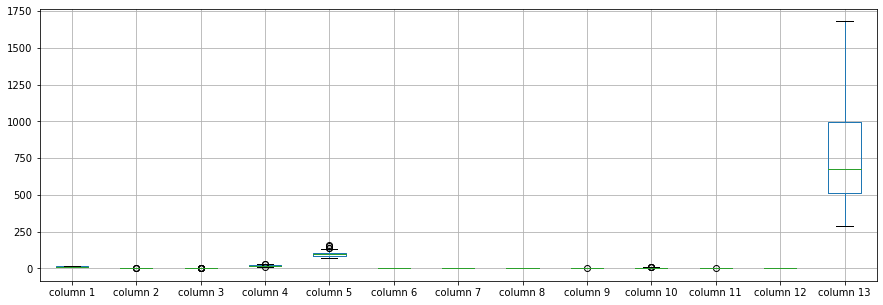

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.034167
column 2       2.353333
column 3       2.373450
column 4      19.466082
column 5      99.725146
column 6       2.297927
column 7       2.010897
column 8       0.361111
column 9       1.587887
column 10      5.115824
column 11      0.957427
column 12      2.591901
column 13    753.923077
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.111682,0.167294,-0.262429,0.246210,0.286519,0.254591,-0.172910,0.157343,0.519815,-0.140469,0.107984,0.617936
column 2,0.111682,1.000000,0.134127,0.280724,-0.065645,-0.340252,-0.415687,0.292812,-0.245076,0.246395,-0.585381,-0.370428,-0.218486
column 3,0.167294,0.134127,1.000000,0.427368,0.263839,0.105020,0.067257,0.189707,0.033511,0.259330,-0.043725,-0.015127,0.249781
column 4,-0.262429,0.280724,0.427368,1.000000,-0.105625,-0.344862,-0.399704,0.353233,-0.155273,0.029882,-0.253435,-0.326271,-0.448112
column 5,0.246210,-0.065645,0.263839,-0.105625,1.000000,0.191159,0.163842,-0.280292,0.237792,0.188908,0.051964,0.063823,0.370064
column 6,0.286519,-0.340252,0.105020,-0.344862,0.191159,1.000000,0.863649,-0.459759,0.614265,-0.058790,0.407666,0.717585,0.532006
column 7,0.254591,-0.415687,0.067257,-0.399704,0.163842,0.863649,1.000000,-0.571186,0.674389,-0.210163,0.550974,0.802263,0.530866
column 8,-0.172910,0.292812,0.189707,0.353233,-0.280292,-0.459759,-0.571186,1.000000,-0.339551,0.138268,-0.224044,-0.481545,-0.366229
column 9,0.157343,-0.245076,0.033511,-0.155273,0.237792,0.614265,0.674389,-0.339551,1.000000,0.002148,0.314093,0.545568,0.345279
column 10,0.519815,0.246395,0.259330,0.029882,0.188908,-0.058790,-0.210163,0.138268,0.002148,1.000000,-0.551178,-0.413406,0.277674


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+31,13+31+31,13+31+31,13+31+31+31+31,13+31+31+31+31+31,13+31+31+31+31+31+31,13+31+31+31+31+31,13+31+31+31+31,13+31+31+31,13+31+31,13+31,13], vae_layer = False, seed = 310)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 852.1337890625
Epoch: 1 , loss: 856.0583329634233
Epoch: 2 , loss: 857.4473488547585
Epoch: 3 , loss: 855.8748057972301
Epoch: 4 , loss: 852.2938232421875
Epoch: 5 , loss: 856.0998313210227
Epoch: 6 , loss: 860.1371903852983
Epoch: 7 , loss: 861.8429842862216
Epoch: 8 , loss: 859.9538907137784
Epoch: 9 , loss: 857.5208740234375
Epoch: 10 , loss: 853.9021162553267
Epoch: 11 , loss: 858.8099975585938
Epoch: 12 , loss: 860.8676591352983
Epoch: 13 , loss: 854.7132901278409
Epoch: 14 , loss: 859.0444113991477
Epoch: 15 , loss: 860.2922640713779
Epoch: 16 , loss: 861.7412941672585
Epoch: 17 , loss: 851.8328690962358
Epoch: 18 , loss: 860.8300281871449
Epoch: 19 , loss: 856.9926036487926
Epoch: 20 , loss: 858.2365056818181
Epoch: 21 , loss: 859.8141645951705
Epoch: 22 , loss: 860.4367897727273
Epoch: 23 , loss: 852.4457286487926
Epoch: 24 , loss: 849.4749200994319
Epoch: 25 , loss: 855.0293190696023
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,-2.110544,0.0,0.0,0.0,0.0,-2.361115,0.0,-1.540618,0.0,-0.844044,-2.487466,-703.228703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
174,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
175,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
176,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3345.892524587156, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.30701675239624937

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.710000,2.43,15.6,127.0,2.80,3.060000,0.28,2.290000,5.64,1.040000,3.920000,1065.000000
1,13.20,1.780000,2.14,11.2,100.0,2.65,2.760000,0.26,1.280000,4.38,1.050000,3.400000,1050.000000
2,13.16,2.360000,2.67,18.6,101.0,2.80,3.240000,0.30,2.810000,5.68,1.030000,3.170000,1185.000000
3,14.37,1.950000,2.50,16.8,113.0,3.85,3.490000,0.24,2.180000,7.80,0.860000,3.450000,1480.000000
4,13.24,0.479456,2.87,21.0,118.0,2.80,0.328885,0.39,0.279382,4.32,0.195956,0.442534,31.771297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.650000,2.45,20.5,95.0,1.68,0.610000,0.52,1.060000,7.70,0.640000,1.740000,740.000000
174,13.40,3.910000,2.48,23.0,102.0,1.80,0.750000,0.43,1.410000,7.30,0.700000,1.560000,750.000000
175,13.27,4.280000,2.26,20.0,120.0,1.59,0.690000,0.43,1.350000,10.20,0.590000,1.560000,835.000000
176,13.17,2.590000,2.37,20.0,120.0,1.65,0.680000,0.53,1.460000,9.30,0.600000,1.620000,840.000000


In [20]:
imputations[-1].to_excel("Wine_AG_10(imp).xlsx", index=False, header=False)